相關係數(x,y):-0.045537343262831195
line:Regression line: y=0.62+-0.00x, r=-0.045537


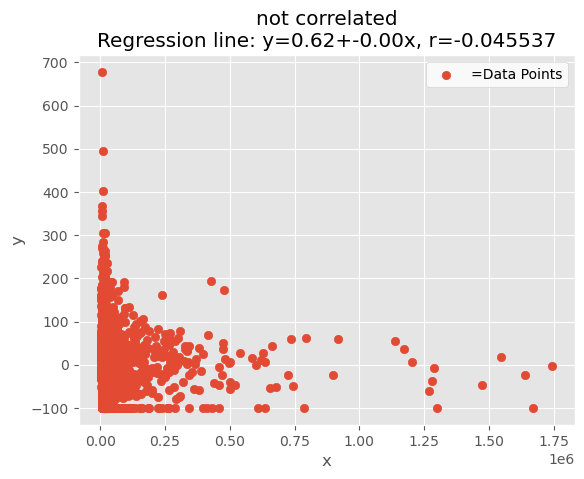

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import scipy.stats
import pandas as pd

# 驗證相關係數
def Pearson_correlation(X, Y):
    if len(X) == len(Y):
        Sum_xy = sum((X - X.mean()) * (Y - Y.mean()))
        Sum_x_squared = sum((X - X.mean()) ** 2)
        Sum_y_squared = sum((Y - Y.mean()) ** 2)
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
        return corr

for i in range(1, 2):
    # 讀取CSV檔案
    df = pd.read_excel('top200_training.xlsx')

    # 提取X和Y列的數據
    x = df['市值(百萬元)'].values
    y = df['Return'].values

    # 將x和y轉換為NumPy數組
    x = np.array(x)
    y = np.array(y)
    #x
    #y

    # 驗證相關係數
    correlation = Pearson_correlation(x, y)
    #驗證相關係數    
    print(f'相關係數(x,y):{Pearson_correlation(x,y)}')    

    # 使用回歸線、其方程和 Pearson 相關係數創建 x-y 圖。
    slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

    # 取得包含回歸線方程和相關係數值的字串
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.6f}'
    print(f'line:{line}')

    # 創建 x-y 圖
    fig, ax = plt.subplots()

    # 如果具有相關性，則畫折線連接數據點
    if abs(correlation) > 0.5:
        ax.plot(x, y, label=line, marker='o', linestyle='-')
        if(correlation) > 0:
            ax.set_title('positive correlated\n'+line)
        if(correlation) < 0:
            ax.set_title('negative correlated\n'+line)
    else:
        # 如果不具相關性，則顯示點的散布位置
        ax.scatter(x, y, label='=Data Points', marker='o')
        ax.set_title('not correlated\n'+line)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(facecolor='white')

    # 保存圖形到檔案夾
    plt.savefig(f'final_cor/cor{i}.png')

    # 顯示當前圖形
    plt.show()
